# Risk Management VaR/Monte Carlo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import yfinance as yf

In [2]:
sp_returns=yf.download('SPY', start='2011-12-12', end='2021-12-12')

[*********************100%***********************]  1 of 1 completed


In [3]:
sp_returns.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-12-12,124.949997,124.970001,123.160004,124.209999,101.913948,215826100
2011-12-13,124.860001,125.570000,122.449997,123.050003,100.962181,245159800
2011-12-14,122.559998,123.029999,121.470001,121.739998,99.887337,238618800
2011-12-15,123.029999,123.199997,121.989998,122.180000,100.248352,199109200
2011-12-16,122.230003,122.949997,121.300003,121.589996,100.396988,220481400


In [4]:
sp_returns=sp_returns['Close']

In [5]:
sp_returns

Date
2011-12-12    124.209999
2011-12-13    123.050003
2011-12-14    121.739998
2011-12-15    122.180000
2011-12-16    121.589996
                 ...    
2021-12-06    458.790009
2021-12-07    468.279999
2021-12-08    469.519989
2021-12-09    466.350006
2021-12-10    470.739990
Name: Close, Length: 2517, dtype: float64

In [6]:
sp_returns=sp_returns.pct_change(1)

In [7]:
sp_returns=pd.DataFrame(sp_returns)

In [8]:
sp_returns=sp_returns.iloc[1:,:]

In [9]:
sp_returns

,Close
Date,
2011-12-13,-0.009339
2011-12-14,-0.010646
2011-12-15,0.003614
2011-12-16,-0.004829
2011-12-19,-0.010692
...,...
2021-12-06,0.011843
2021-12-07,0.020685
2021-12-08,0.002648


In [10]:
sp_returns.size

2516

In [11]:
sp_returns.mean()

Close    0.000582
dtype: float64

In [12]:
sp_returns.std()

Close    0.010208
dtype: float64

In [13]:
x = np.linspace(-0.1, 0.1, 1000)

In [14]:
y = stats.norm.pdf(x, loc = sp_returns.mean(), scale = sp_returns.std())

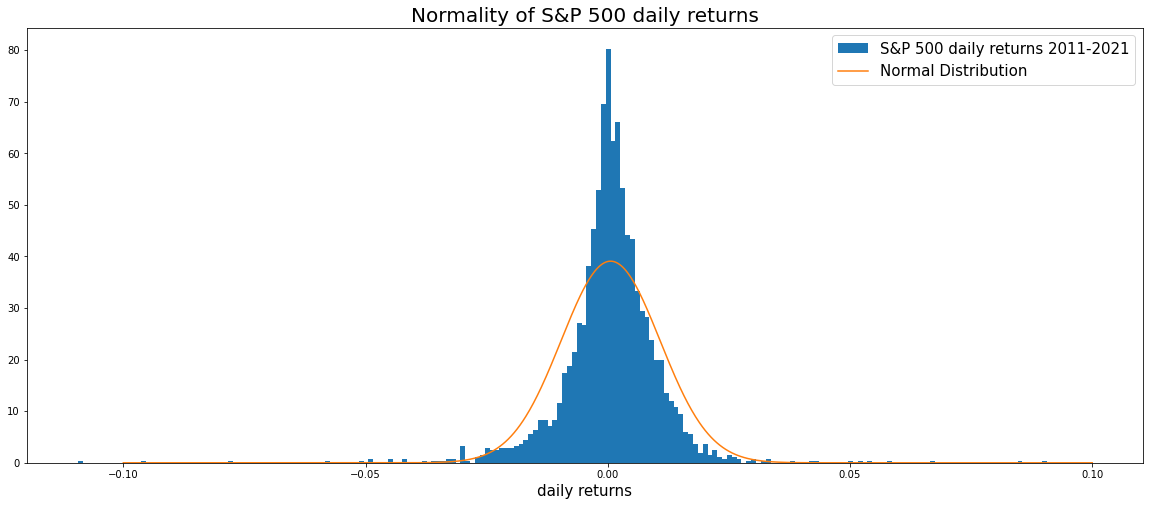

In [15]:
plt.figure(figsize = (20, 8))
plt.hist(sp_returns, density = True, bins = 200, label = "S&P 500 daily returns 2011-2021")
plt.plot(x, y, label = "Normal Distribution")
plt.title("Normality of S&P 500 daily returns", fontsize = 20)
plt.xlabel("daily returns",  fontsize = 15)
plt.legend(fontsize = 15)
#plt.savefig("Normality of S&P 500 daily returns")
plt.show()

In [16]:
stats.skew(sp_returns)

array([-0.68345926])

In [17]:
stats.skewtest(sp_returns)

SkewtestResult(statistic=array([-12.77627152]), pvalue=array([2.22481854e-37]))

In [18]:
stats.kurtosis(sp_returns)

array([17.50953051])

In [19]:
stats.kurtosistest(sp_returns)

KurtosistestResult(statistic=array([24.37242096]), pvalue=array([3.35440876e-131]))

In [20]:
stats.normaltest(sp_returns)

NormaltestResult(statistic=array([757.24801727]), pvalue=array([3.67859803e-165]))

### Value-at-Risk (VaR) - Parametric Method

__1% VaR for one day__

In [21]:
I0 = 1000000
prob = 0.01

In [22]:
mean = sp_returns.mean()
mean

Close    0.000582
dtype: float64

In [23]:
std = sp_returns.std()
std

Close    0.010208
dtype: float64

In [24]:
stats.norm.ppf(loc = mean, scale = std, q = prob)

array([-0.02316462])

In [25]:
var_p = stats.norm.ppf(loc = mean, scale = std, q = prob) * I0
var_p

array([-23164.61940291])

__Using a mean return forecast__

In [26]:
annual = -0.05

In [27]:
daily = (1 + annual)**(1/252) - 1
daily

-0.0002035241051570047

In [28]:
stats.norm.ppf(loc = daily, scale = std, q = prob) * I0

array([-23950.17270967])

### Value-at-Risk (VaR) - Historical Method

__1% VaR of 1,000,000 USD over a one-day period__

In [29]:
I0 = 1000000
prob = 0.01

In [30]:
np.percentile(sp_returns, prob * 100)

-0.029752945013093102

In [31]:
var_h = np.percentile(sp_returns, prob * 100) * I0
var_h

-29752.945013093104

### Monte Carlo Simulation - Parametric Method

In [32]:
sims = 10000
days = 63

In [33]:
np.random.seed(123)
ret = np.random.normal(loc = mean, scale = std, size = days * sims).reshape(sims, days)

In [34]:
ret#.shape

array([[-0.01049976,  0.01076263,  0.00347059, ..., -0.00730555,
         0.00869574,  0.00379002],
       [-0.01295608,  0.01504939,  0.00882205, ...,  0.00821959,
         0.01700306, -0.00217642],
       [ 0.00887416,  0.00568322,  0.00542402, ..., -0.00502118,
        -0.00940169, -0.00303991],
       ...,
       [-0.01092393, -0.02027868, -0.00830744, ..., -0.01331634,
        -0.00253618,  0.00609125],
       [-0.01594819, -0.01141147,  0.0088475 , ...,  0.01322623,
        -0.00701102, -0.00236609],
       [ 0.00492586,  0.00900063, -0.01137813, ...,  0.00219205,
         0.01939477,  0.00784996]])

In [35]:
paths = (ret + 1).cumprod(axis = 1) * I0

In [36]:
paths

array([[ 989500.24356732, 1000149.86552551, 1003620.97293169, ...,
        1083414.22500168, 1092835.3183486 , 1096977.18796251],
       [ 987043.91644342, 1001898.3203622 , 1010737.12065259, ...,
         991501.89231125, 1008360.45380659, 1006165.83741942],
       [1008874.16139951, 1014607.81922025, 1020111.07389355, ...,
        1056350.76121014, 1046419.28394326, 1043238.26297552],
       ...,
       [ 989076.06791084,  969018.90714846,  960968.8422028 , ...,
         963954.98913493,  961510.22891703,  967367.02668063],
       [ 984051.81046967,  972822.33018449,  981429.37225793, ...,
        1101006.15642653, 1093286.97476294, 1090700.1587899 ],
       [1004925.85612774, 1013970.82579772, 1002433.73814158, ...,
        1156890.87733931, 1179328.50821427, 1188586.18594922]])

In [37]:
paths = np.hstack((np.ones(sims).reshape(sims, 1)*100, paths))
paths

array([[1.00000000e+02, 9.89500244e+05, 1.00014987e+06, ...,
        1.08341423e+06, 1.09283532e+06, 1.09697719e+06],
       [1.00000000e+02, 9.87043916e+05, 1.00189832e+06, ...,
        9.91501892e+05, 1.00836045e+06, 1.00616584e+06],
       [1.00000000e+02, 1.00887416e+06, 1.01460782e+06, ...,
        1.05635076e+06, 1.04641928e+06, 1.04323826e+06],
       ...,
       [1.00000000e+02, 9.89076068e+05, 9.69018907e+05, ...,
        9.63954989e+05, 9.61510229e+05, 9.67367027e+05],
       [1.00000000e+02, 9.84051810e+05, 9.72822330e+05, ...,
        1.10100616e+06, 1.09328697e+06, 1.09070016e+06],
       [1.00000000e+02, 1.00492586e+06, 1.01397083e+06, ...,
        1.15689088e+06, 1.17932851e+06, 1.18858619e+06]])

In [38]:
def path_simul_param(daily_returns, days, I0, sims = 10000, seed = 123):
    
    mean = np.mean(daily_returns)
    std = np.std(daily_returns)
    days = int(days)
    
    np.random.seed(seed)
    ret = np.random.normal(loc = mean, scale = std, size = days * sims).reshape(sims, days)
    
    paths = (ret + 1).cumprod(axis = 1) * I0
    paths = np.hstack((np.ones(sims).reshape(sims, 1) * I0, paths))
    return paths

In [39]:
paths = path_simul_param(daily_returns = sp_returns, days =  63, I0 = 100)

In [40]:
paths

array([[100.        ,  98.9502446 , 100.01500896, ..., 108.34055798,
        109.28248508, 109.6965984 ],
       [100.        ,  98.70466071, 100.18982134, ...,  99.15113156,
        100.83668014, 100.6172724 ],
       [100.        , 100.88725134, 101.4605139 , ..., 105.63472184,
        104.64178705, 104.32376071],
       ...,
       [100.        ,  98.90783547,  96.90252483, ...,  96.396955  ,
         96.15253502,  96.73811873],
       [100.        ,  98.40550958,  97.28279237, ..., 110.09937101,
        109.32762772, 109.06901271],
       [100.        , 100.49249928, 101.39682733, ..., 115.68662051,
        117.9299032 , 118.85547749]])

In [41]:
paths.shape

(10000, 64)

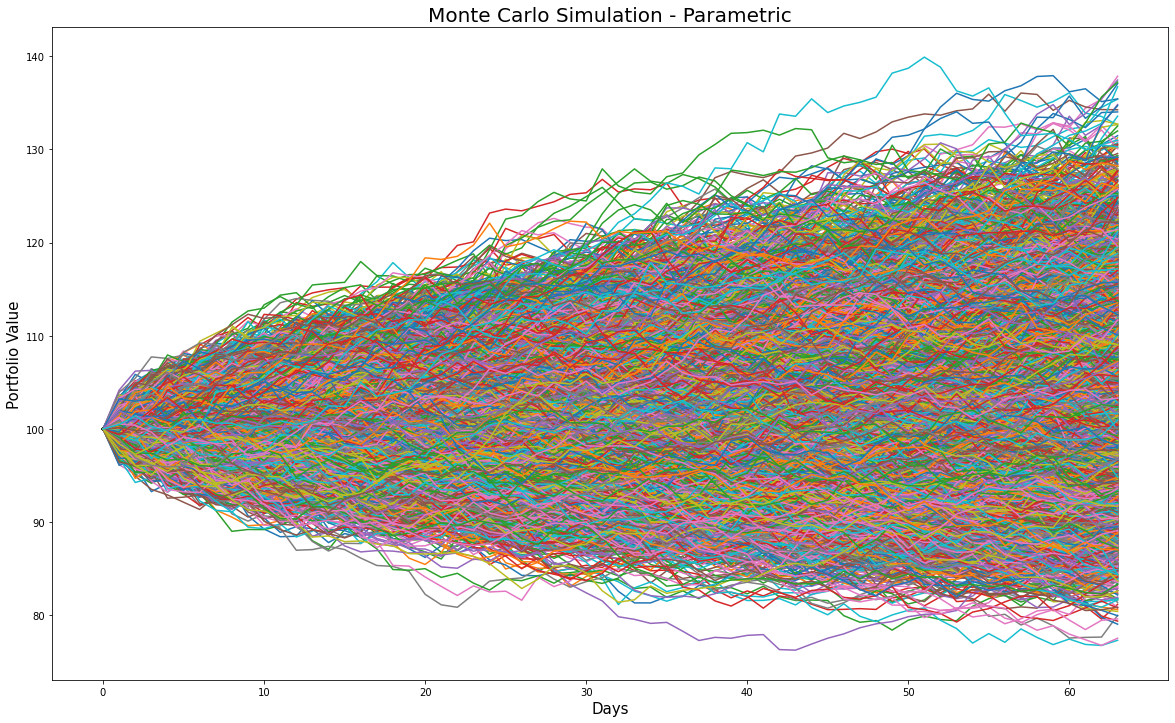

In [42]:
plt.figure(figsize = (20, 12))
plt.plot(paths.T)
plt.ylabel("Portfolio Value", fontsize = 15)
plt.xlabel("Days", fontsize = 15 )
plt.title("Monte Carlo Simulation - Parametric", fontsize = 20)
#plt.savefig("Monte Carlo Simulation - Parametric")
plt.show()

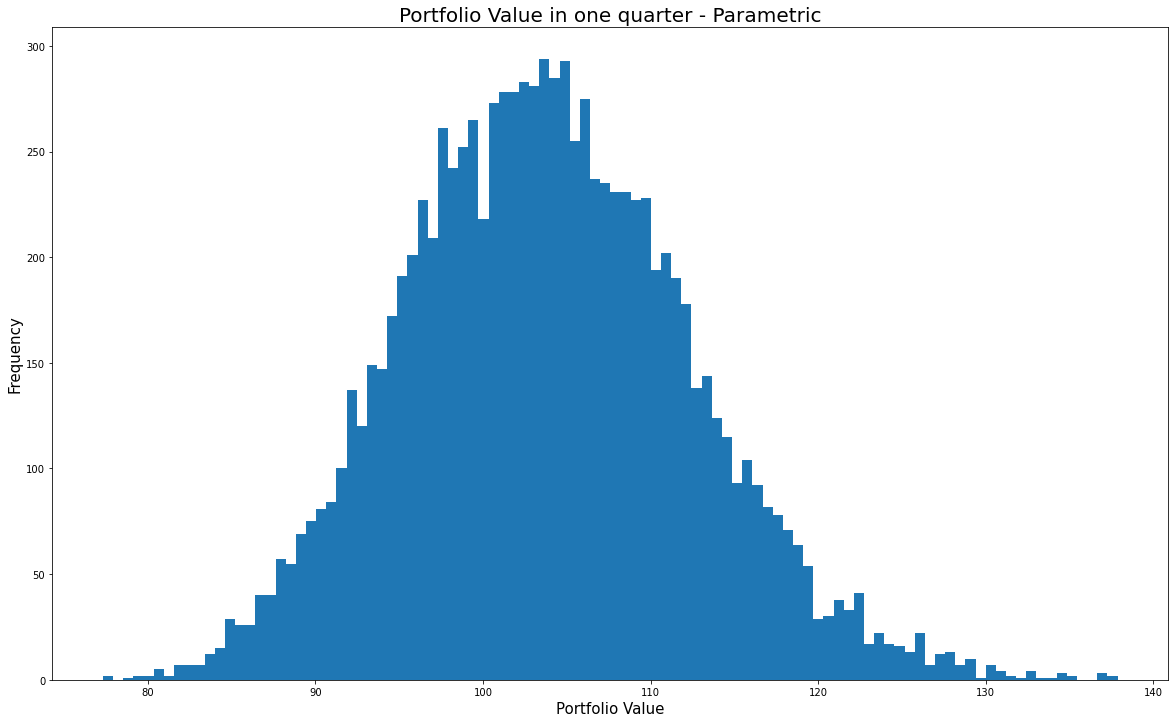

In [43]:
plt.figure(figsize = (20, 12))
plt.hist(paths[:, -1], bins = 100)
plt.title("Portfolio Value in one quarter - Parametric", fontsize = 20)
plt.xlabel("Portfolio Value", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
#plt.savefig("Portfolio Value in one quarter - Parametric")
plt.show()

In [44]:
sims = 1000000
I0 = 1000000

In [45]:
paths = path_simul_param(sp_returns, days = 63, I0 = I0, sims = sims) 

In [46]:
paths.shape

(1000000, 64)

In [47]:
final_p = paths[:, -1]

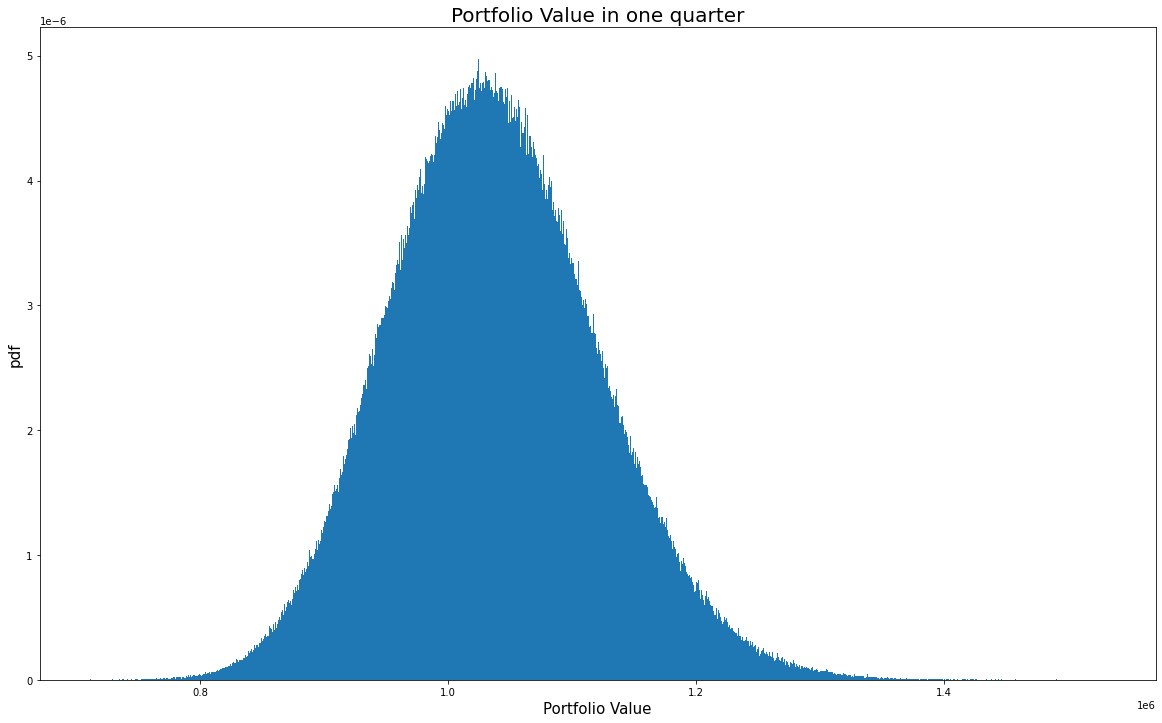

In [48]:
plt.figure(figsize = (20, 12))
plt.hist(final_p, bins = 1000, density = True)
plt.title("Portfolio Value in one quarter", fontsize = 20)
plt.xlabel("Portfolio Value", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
#plt.savefig("Portfolio Value in one quarter")
plt.show()

In [49]:
final_p.mean()

1037480.7267652036

In [50]:
np.median(final_p)

1034086.1643048107

In [51]:
final_p.std()

84192.18949029056

In [52]:
stats.skew(final_p)

0.24306481574681524

__1% Value-at-Risk (VaR) of 1,000,000 USD over a period of one quarter__

In [53]:
prob = 0.01

In [54]:
np.percentile(final_p, prob * 100)

856187.7168608318

In [55]:
np.percentile(final_p, prob * 100) - I0

-143812.28313916817

In [56]:
def var_param(daily_returns, days, prob, I0, sims = 10000, seed = 123):
    
    mean = np.mean(daily_returns)
    std = np.std(daily_returns)
    days = int(days)
    
    np.random.seed(seed)
    ret = np.random.normal(loc = mean, scale = std, size = days * sims).reshape(sims, days)
    
    final = (ret + 1).prod(axis = 1) * I0
    var = np.percentile(final, prob) - I0
    
    return var 

In [57]:
var_param(sp_returns, days = 1, prob = 1, I0 = 1000000, sims = 1000000)

-23170.001489177812

In [58]:
var_param(sp_returns, days = 63, prob = 1, I0 = 1000000, sims = 1000000)

-143812.28313916817

In [59]:
var_p1= []
for i in range(1, 252+1):
    var_p1.append(-var_param(sp_returns, days = i, prob = 1, I0 = 1000000))

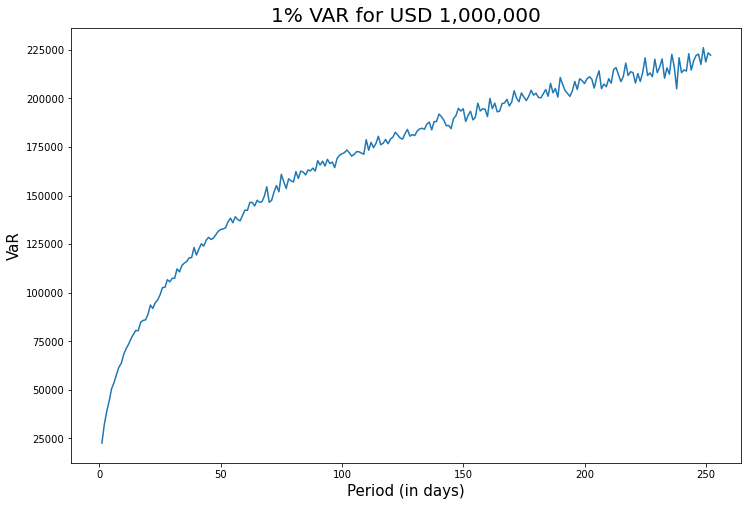

In [60]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 252+1), var_p1)
plt.title("1% VAR for USD 1,000,000", fontsize = 20)
plt.xlabel("Period (in days)", fontsize = 15)
plt.ylabel("VaR", fontsize = 15)
#plt.savefig("1% VAR for USD 1,000,000")
plt.show()

In [61]:
var_p2= []
for i in np.linspace(0.1, 5, 100):
    var_p2.append(-var_param(sp_returns, days = 63, prob = i, I0 = 1000000))

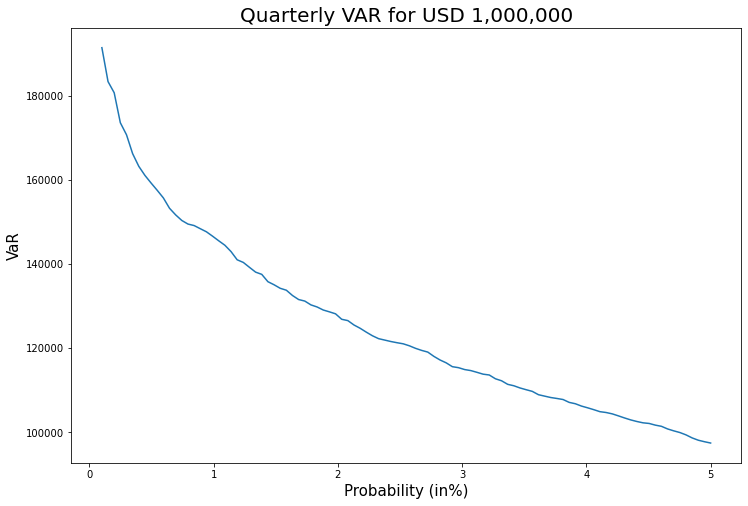

In [62]:
plt.figure(figsize = (12, 8))
plt.plot(np.linspace(0.1, 5, 100),var_p2)
plt.title("Quarterly VAR for USD 1,000,000", fontsize = 20)
plt.xlabel("Probability (in%)", fontsize = 15)
plt.ylabel("VaR", fontsize = 15)
#plt.savefig("Quarterly VAR for USD 1,000,000")
plt.show()

### Monte Carlo Simulation - Bootstrapping Method 

In [63]:
I0 = 100
sims = 10000
days = 63

In [64]:
def path_simul_bootstr(daily_returns, days, I0, sims = 10000, seed = 123):
    
    days = int(days)
    
    np.random.seed(seed)
    ret = np.random.choice(daily_returns, size = days * sims, replace = True).reshape(sims, days)
    
    paths = (ret + 1).cumprod(axis = 1) * I0
    paths = np.hstack((np.ones(sims).reshape(sims, 1) * I0, paths))
    
    return paths

In [65]:
paths = path_simul_bootstr(sp_returns['Close'], days = days, I0 = I0, sims = sims)
paths

array([[100.        ,  99.68131214,  99.8855809 , ..., 105.26417436,
        104.36998216, 105.12946443],
       [100.        ,  97.86640733,  97.82840084, ..., 104.95480755,
        105.00387488, 105.00956123],
       [100.        , 100.72363781, 101.12592182, ..., 107.49474921,
        107.54436902, 109.65275681],
       ...,
       [100.        , 101.28095448, 101.08524548, ...,  99.07406794,
         99.52335508, 100.66144878],
       [100.        , 100.83674942, 100.71010889, ..., 100.84586521,
        100.65399273, 100.70480677],
       [100.        , 100.11465232,  99.44193129, ..., 106.16121745,
        106.10558199, 106.0657722 ]])

In [66]:
paths.shape

(10000, 64)

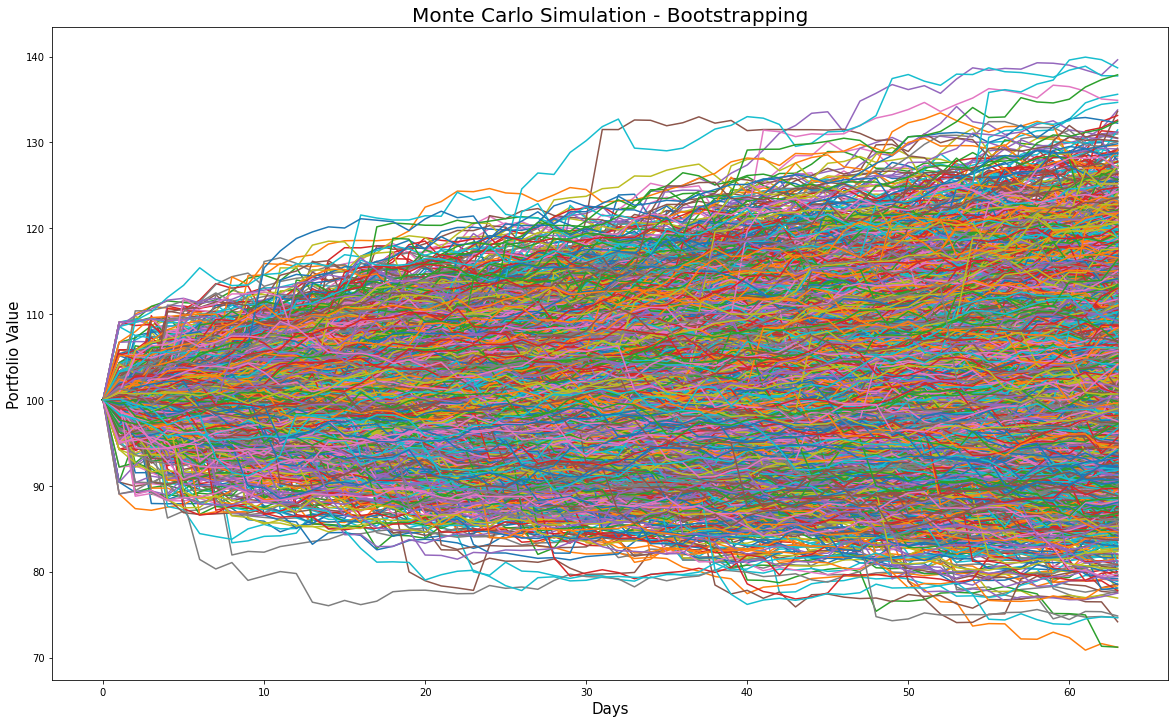

In [67]:
plt.figure(figsize = (20, 12))
plt.plot(paths.T)
plt.ylabel("Portfolio Value", fontsize = 15)
plt.xlabel("Days", fontsize = 15 )
plt.title("Monte Carlo Simulation - Bootstrapping", fontsize = 20)
#plt.savefig("Monte Carlo Simulation - Bootstrapping")
plt.show()

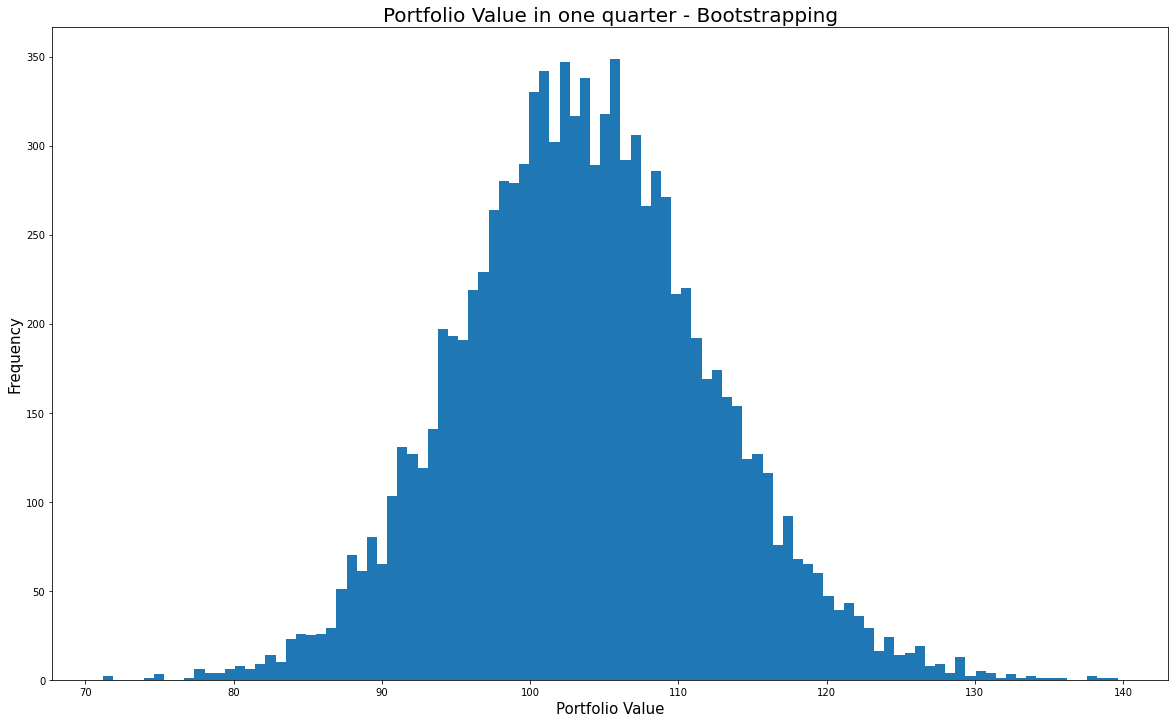

In [68]:
plt.figure(figsize = (20, 12))
plt.hist(paths[:, -1], bins = 100)
plt.title("Portfolio Value in one quarter - Bootstrapping", fontsize = 20)
plt.xlabel("Portfolio Value", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
#plt.savefig("Portfolio Value in one quarter - Bootstrapping")
plt.show()